## K Means Clustering Implementation

In [21]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [22]:
X,y = make_blobs(n_samples=1000,centers=3,n_features=2,random_state=23)

In [23]:
X.shape

(1000, 2)

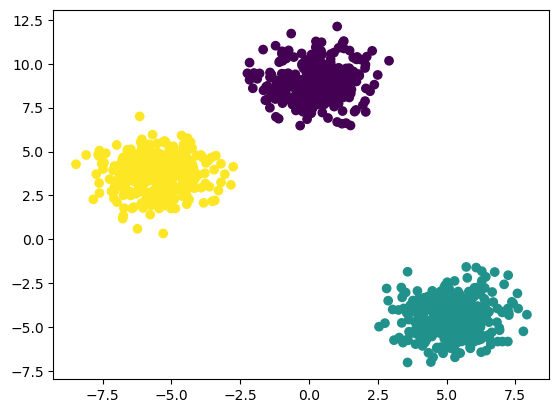

In [24]:
plt.scatter(X[:,0],X[:,1],c=y)

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33, random_state = 42)

In [26]:
from sklearn.cluster import KMeans

In [27]:
## manual process
## elbow method to select the K value

wcss = []
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

In [28]:
wcss

[34827.57682552021,
 7935.437286145417,
 1319.273053158561,
 1140.4677884655127,
 992.0708509383513,
 854.4400491658456,
 756.3158439913495,
 665.3085687702236,
 578.6839490211597,
 531.2772418983623]

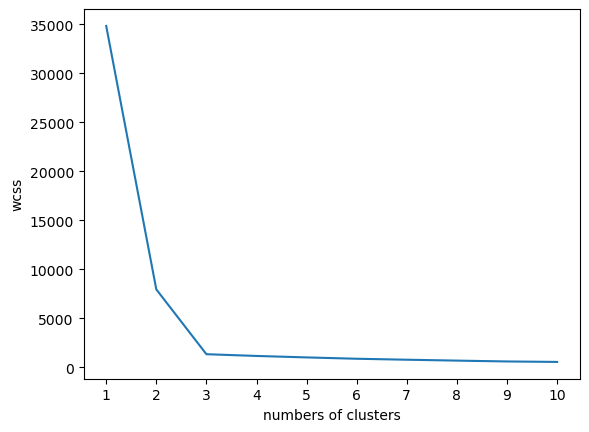

In [29]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("numbers of clusters")
plt.ylabel("wcss")
plt.show()

In [30]:
kmeans = KMeans(n_clusters=3,init="k-means++")

In [31]:
y_label = kmeans.fit_predict(X_train)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [32]:
y_test_label = kmeans.predict(X_test)

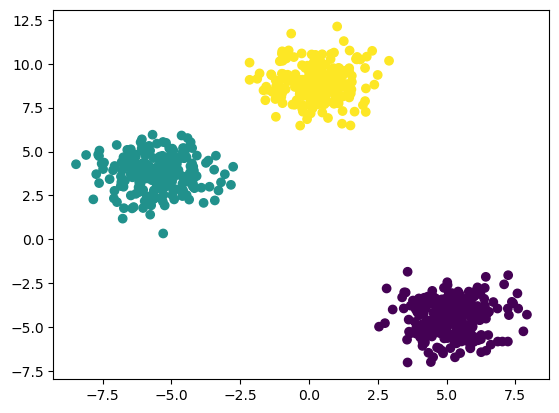

In [33]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_label)

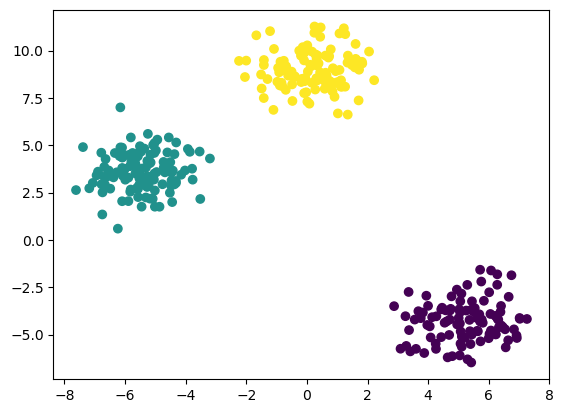

In [35]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_test_label)

In [41]:
## knee locater
!pip install kneed

In [44]:
from kneed import KneeLocator

In [47]:
k1 = KneeLocator(range(1,11),wcss,curve="convex",direction='decreasing')
k1.elbow

3

In [49]:
## perform metricx
## silhouette score
from sklearn.metrics import silhouette_score

In [50]:
silhouette_coefficients = []
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    score = silhouette_score(X_train,kmeans.labels_)
    silhouette_coefficients.append(score)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

In [51]:
silhouette_coefficients

[0.7281443868598331,
 0.8071181203797672,
 0.6357733426488265,
 0.4814001336222496,
 0.33774816858089124,
 0.3488061330821241,
 0.34250557655657293,
 0.34241181563873846,
 0.34239421745112664]

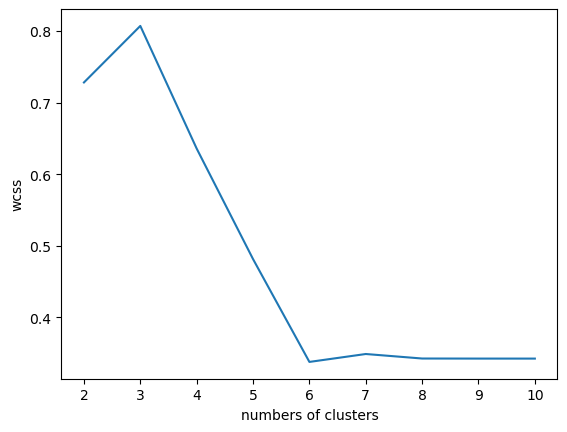

In [52]:
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("numbers of clusters")
plt.ylabel("wcss")
plt.show()